In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_columns",None)

In [5]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [6]:
import category_encoders as ce

In [7]:
dataset = pd.read_csv("/content/car_evaluation.csv")

In [8]:
dataset.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# data preprocessing

In [10]:
df = dataset.copy()

In [12]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [14]:
df["class"].value_counts()

,count
class,
unacc,1209
acc,384
good,69
vgood,65


In [15]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


# independent and dependent feature

In [17]:
x = df.drop("class",axis=1)
y = df["class"]

# train test split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# encoading

In [22]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [23]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


In [24]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,1,4,1,2,1
932,2,2,4,2,2,1
628,4,1,3,1,2,3
1497,3,1,3,2,3,2
1262,2,3,4,3,3,1


# Decision tree

## pre pruning

In [47]:
decision_tree = DecisionTreeClassifier()


In [48]:
params = {"criterion":["gini", "entropy", "log_loss"],
          "max_depth":[1,2,3,4,5,6,7,8,9,10],
          "splitter":["best", "random"]
          }

## hyperparameter tuning


In [50]:
grid_decision_tree = GridSearchCV(decision_tree,param_grid=params,cv=5)

In [59]:
grid_decision_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [60]:
grid_decision_tree.best_params_

{'criterion': 'log_loss', 'max_depth': 10, 'splitter': 'best'}

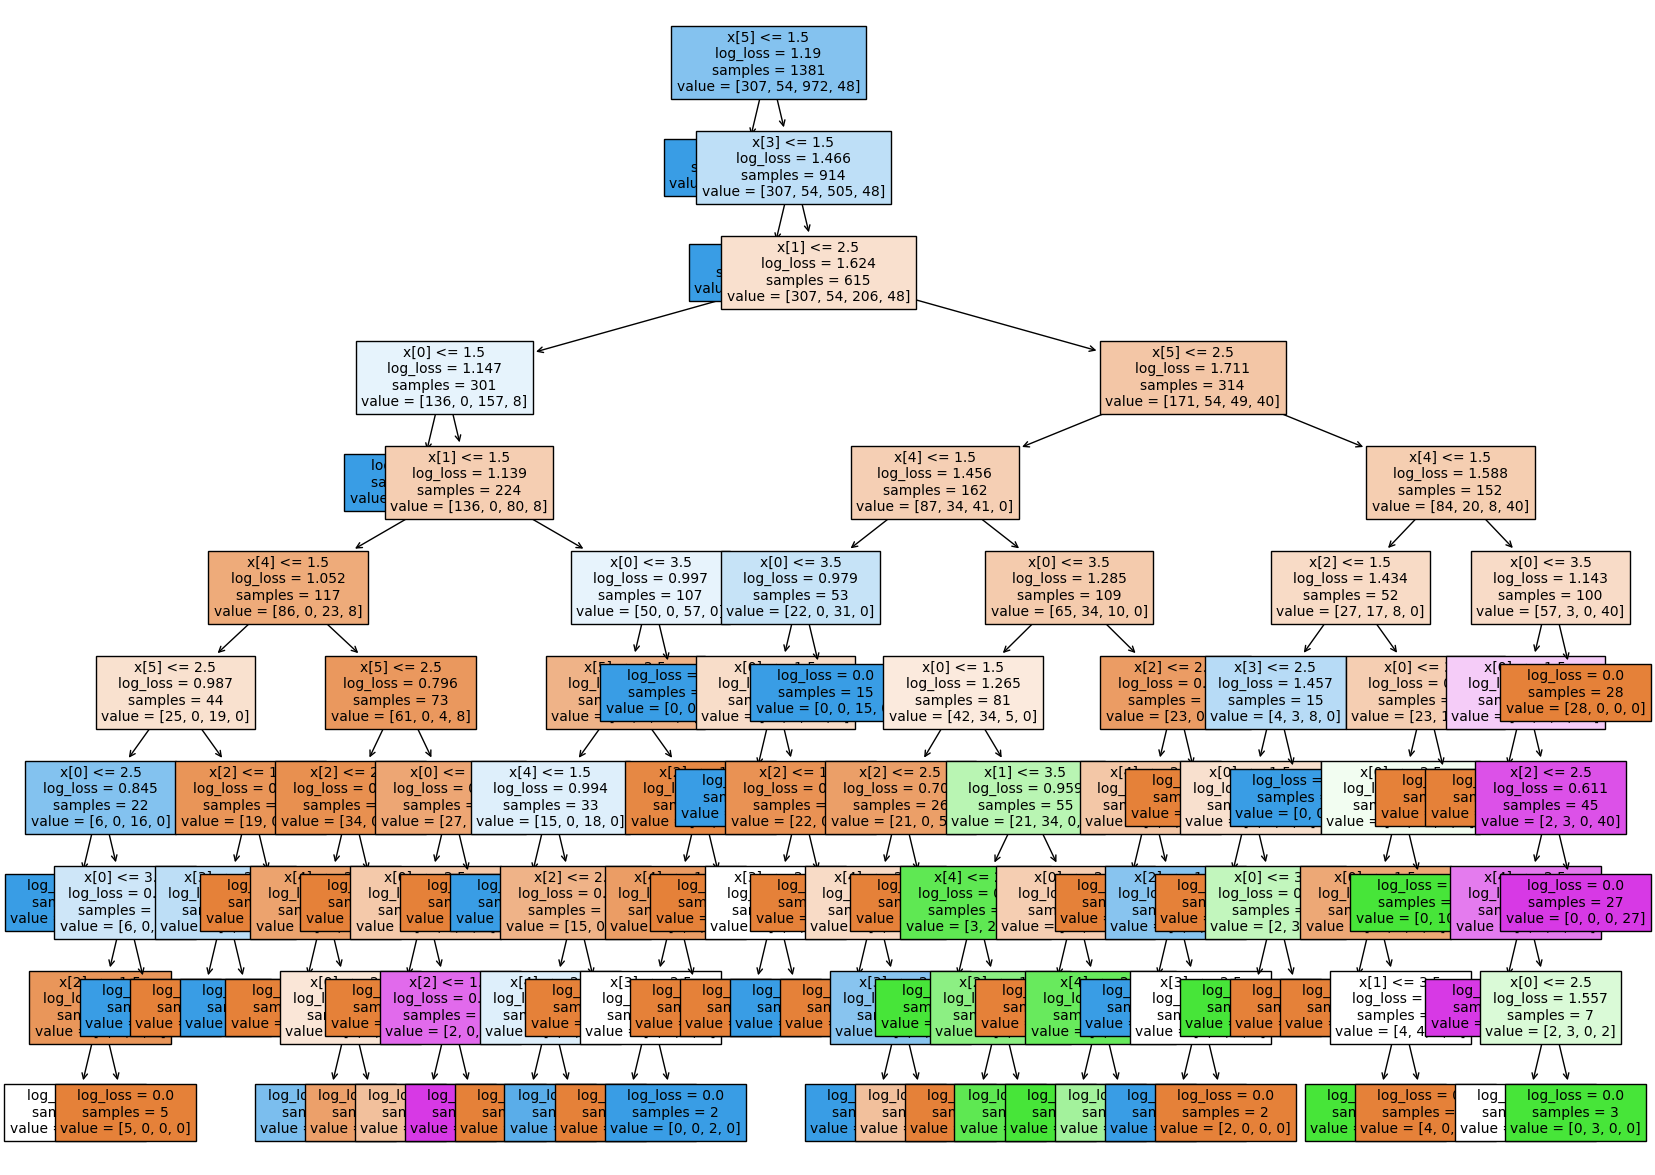

In [61]:
plt.figure(figsize=(20,15))
tree.plot_tree(grid_decision_tree.best_estimator_,filled=True,fontsize=10)
plt.show()

In [63]:
pred = grid_decision_tree.predict(x_test)

In [64]:
accuracy = accuracy_score(y_test,pred)
accuracy

0.9595375722543352

In [65]:
confusion_matrix(y_test,pred)

array([[ 72,   3,   1,   1],
       [  3,  12,   0,   0],
       [  3,   0, 234,   0],
       [  1,   2,   0,  14]])

In [72]:
report = classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

         acc       0.91      0.94      0.92        77
        good       0.71      0.80      0.75        15
       unacc       1.00      0.99      0.99       237
       vgood       0.93      0.82      0.87        17

    accuracy                           0.96       346
   macro avg       0.89      0.89      0.88       346
weighted avg       0.96      0.96      0.96       346

